# Comparing Clustering Algorithms

## Importing Libraries

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [23]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.00,615.00,614.00,597.00,614.00,615.00,615.00,615.00,605.00,615.00,615.00,614.00
mean,308.00,47.41,41.62,68.28,28.45,34.79,11.40,8.20,5.37,81.29,39.53,72.04
std,177.68,10.06,5.78,26.03,25.47,33.09,19.67,2.21,1.13,49.76,54.66,5.40
min,1.00,19.00,14.90,11.30,0.90,10.60,0.80,1.42,1.43,8.00,4.50,44.80
25%,154.50,39.00,38.80,52.50,16.40,21.60,5.30,6.94,4.61,67.00,15.70,69.30
50%,308.00,47.00,41.95,66.20,23.00,25.90,7.30,8.26,5.30,77.00,23.30,72.20
75%,461.50,54.00,45.20,80.10,33.08,32.90,11.20,9.59,6.06,88.00,40.20,75.40
max,615.00,77.00,82.20,416.60,325.30,324.00,254.00,16.41,9.67,1079.10,650.90,90.00


In [24]:
# stats of categorical data
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

if not categorical_columns.empty:
    categorical_description = df[categorical_columns].describe()
    print(round(categorical_description, 2))
else:
    print("No categorical columns found in the DataFrame.")

             Category  Sex
count             615  615
unique              5    2
top     0=Blood Donor    m
freq              533  377


## Handling Missing Data

In [25]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [26]:
def handle_missing_data(df):
    """
    Replaces NaN values in numerical columns with the mean of the respective columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with numerical columns to handle missing data.
    
    Returns:
    pd.DataFrame: A DataFrame with missing numerical data replaced by column means.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numerical_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    
    return df

df = handle_missing_data(df)

# Label Encoding

In [27]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [28]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [29]:
def encode_categorical_columns(df):
    """
    Encodes all categorical columns in the DataFrame using LabelEncoder.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with categorical columns to be encoded.
    
    Returns:
    pd.DataFrame: A DataFrame with all categorical columns encoded.
    """
    enc = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        df[column] = enc.fit_transform(df[column])
    
    return df

# Encode the categorical columns
df = encode_categorical_columns(df)

# Checking the Dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    int32  
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    int32  
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(10), int32(2), int64(2)
memory usage: 62.6 KB


In [31]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [32]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Data Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
# Select relevant features for clustering
all_features = df.columns
selected_features = []
X = df[all_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA

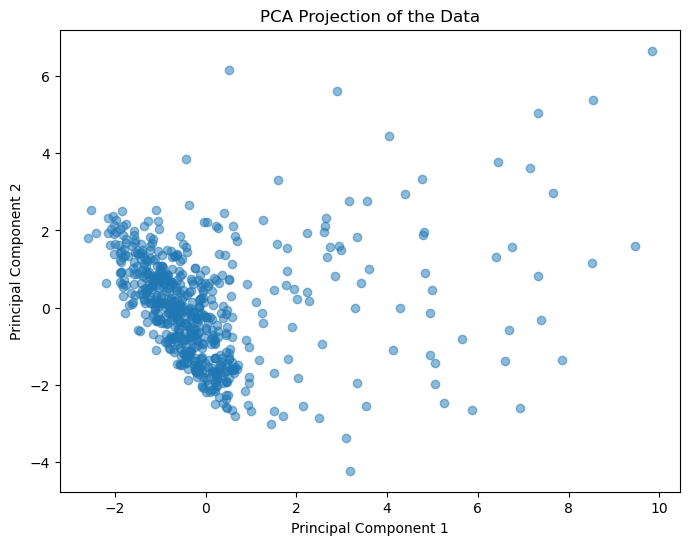

In [35]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Algorithms

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [37]:
# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Custom scorer for Davies-Bouldin score
def davies_bouldin_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return -davies_bouldin_score(X, labels)  # Negative because GridSearchCV maximizes the score

In [38]:
kmeans_params = {
    'n_clusters': range(2, 7),
    'init': ['k-means++'],
    'n_init': [10, 20, 30]
}

kmeans = KMeans(random_state=42)
kmeans_grid = GridSearchCV(kmeans, kmeans_params, scoring=silhouette_scorer, cv=5)
kmeans_grid.fit(X_pca)

print("Best KMeans parameters:", kmeans_grid.best_params_)
print("Best KMeans silhouette score:", kmeans_grid.best_score_)

Best KMeans parameters: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Best KMeans silhouette score: 0.4497778213856963


In [39]:
dbscan_params = {
  'eps': np.arange(0.1, 1.1, 0.1),
  'min_samples': range(2, 11),
}

dbscan = DBSCAN()
dbscan_grid = GridSearchCV(dbscan, dbscan_params, scoring=silhouette_scorer, cv=5)
dbscan_grid.fit(X_pca)

print("Best DBSCAN parameters:", dbscan_grid.best_params_)
print("Best DBSCAN silhouette score:", dbscan_grid.best_score_)

Best DBSCAN parameters: {'eps': 0.7000000000000001, 'min_samples': 9}
Best DBSCAN silhouette score: 0.4596885279796846


In [40]:
agg_params = {
    'n_clusters': range(2, 7),
    'linkage': ['ward', 'complete', 'average'],
    'affinity': ['euclidean', 'manhattan'],
}

agg = AgglomerativeClustering()
agg_grid = GridSearchCV(agg, agg_params, scoring=silhouette_scorer, cv=5)
agg_grid.fit(X_pca)

print("Best Agglomerative Clustering parameters:", agg_grid.best_params_)
print("Best Agglomerative Clustering silhouette score:", agg_grid.best_score_)

Best Agglomerative Clustering parameters: {'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 2}
Best Agglomerative Clustering silhouette score: 0.5261288004830121


In [41]:
spectral_params = {
    'n_clusters': [2, 3, 4, 5],
    'affinity': ['rbf', 'nearest_neighbors'],
    'gamma': [0.1, 0.5, 1.0],
    'assign_labels': ['kmeans', 'discretize'],
}

spectral = SpectralClustering(random_state=42)
spectral_grid = GridSearchCV(spectral, spectral_params, scoring=silhouette_scorer, cv=5)
spectral_grid.fit(X_pca)

print("Best Spectral Clustering parameters:", spectral_grid.best_params_)
print("Best Spectral Clustering silhouette score:", spectral_grid.best_score_)

Best Spectral Clustering parameters: {'affinity': 'rbf', 'assign_labels': 'kmeans', 'gamma': 1.0, 'n_clusters': 2}
Best Spectral Clustering silhouette score: 0.456691648223854


In [42]:
# Set a global random seed
np.random.seed(42)

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Define clustering algorithms and parameters
algorithms = {
    'KMeans': KMeans(**kmeans_grid.best_params_),
    'DBSCAN': DBSCAN(**dbscan_grid.best_params_),
    'AgglomerativeClustering': AgglomerativeClustering(**agg_grid.best_params_),
    'SpectralClustering': SpectralClustering(**spectral_grid.best_params_),
}

# Evaluate clustering performance
results = []
for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, labels)
        davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
        results.append({'Algorithm': name, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Score': davies_bouldin_avg})
    except Exception as e:
        results.append({'Algorithm': name, 'Silhouette Score': 'Error: ' + str(e), 'Davies-Bouldin Score': 'Error: ' + str(e)})

# Print results
df_results = pd.DataFrame(results)
print(df_results)

                 Algorithm  Silhouette Score  Davies-Bouldin Score
0                   KMeans          0.668878              0.710912
1                   DBSCAN          0.629136              0.874344
2  AgglomerativeClustering          0.771814              0.146111
3       SpectralClustering          0.717136              0.419566
